# Quantum Phase Estimation
This notebook demonstrate the Implementation and working of Quantum Phase Estimation.
In this notebbok ,we will learn:
- What  **Quantum Phase estimation**  is?
- Why phase estimation is fundamantal subroutine for many quantum algorithms.
- How to implememt QPE step-by-step
- how to controlled unitaries encode phase information.
- Implements QPE for:
    - **single qubit rotation**(eigenvalue=phase of rotation)
- Why inverse QFT extract the encoded phase.

## What is Phase Estimation?
Quantum Phase Estimation(QPE) is a core algorithm that allows us to estimate the phase:
$
U|\psi\rangle = e ^ {2 \pi i\phi} |\psi\rangle 
$

QPE finds **$ \phi $** (between 0 and 1) by:
1. Preparing control qubit in superposition.
2. Applying the controlled power of Unitary.
3. Applying the **Inverse Quantum Fourier Transform(QFT inverse)**
4. Measuring control qubit to obtained.



## Import Required Libraries

In [22]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit import Instruction

## Helper Function - Inverse QFT Implementation
**Why we need inverse QFT :**
- After applying controlled-unitary operations  ,the phase is encoded in amplitudes of the control qubit.
- The Inverse QFT convert this encoded phase from amplitude space to **binary measurement space**
- Thus Measurement yields bits representing **$ \phi $**

In [87]:
def inverse_qft(n):
    qc=QuantumCircuit(n,name="QFT-inverse")
     
    
    # Swap Qubits
    #for i in range(n//2):
       # qc.swap(i,n-i-1)
    
    # Apply inverse Rotation
    for j in range(n):
        qc.h(j)
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)),m,j)
    #qc.h(j)
    for i in range(n//2):
        qc.swap(i,n-i-1)
    return qc.to_gate(label="QFT-inverse")


## QPE Circuit Builder (General Form)


In [ ]:
def qpe(unitary,n_counts):
    qc=QuantumCircuit(n_counts+1,n_counts,name="QPE")

    #Step 1- Put Counting Qubit into Superposition so they can sample the eigenvalue phase through controlled-Unitary operations.
    for q in range(n_counts):
        qc.h(q)
    
    
    # Step add - convert unitary circuit to gate
    U_gate= unitary.to_gate(label="Ugate")
    
    # Step 2- Controlled U^(2^k) operations.
    
    for q in range(n_counts):
        U_power=U_gate.power(2**q)
        U_controlled=U_power.control()
        qc.append(U_controlled,[q,n_counts])

    # Step 3 - Apply Inverse QFT
    inv_qft_gate=inverse_qft(n_counts)
    qc.append(inv_qft_gate,range(n_counts))
    
    qc=qc.reverse_bits()

    # Step 4 -Measure Counting Qubits
    qc.measure(range(n_counts),range(n_counts))

    return qc

## Phase Estimation for Single Qubit Rotation
we use the Unitary : $ U=R_z(2\pi \phi) $

So, Eigenvalue is: $ e^{i 2 \pi \phi} $

we choose:
- $ \phi $ = 0.125(i.e 1/8)
- Expected result in binary : '001' (for 3 qubits)

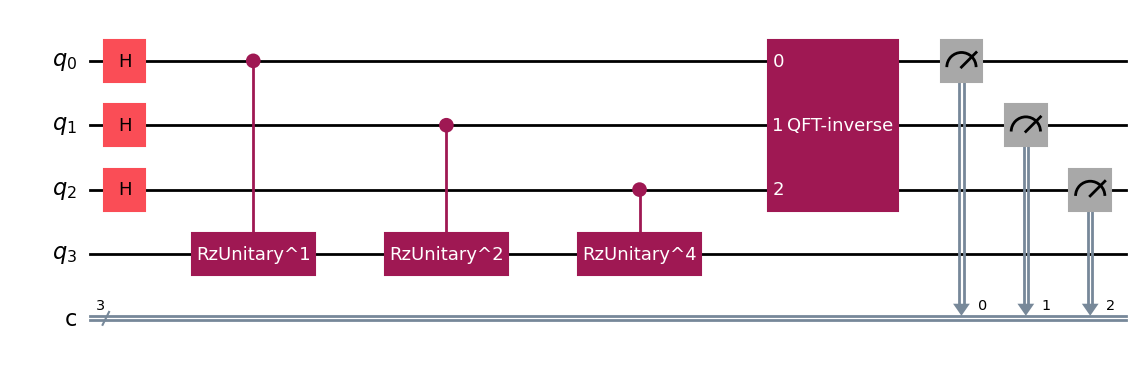

In [95]:
phi =1/8 
theta = 2 * np.pi *phi
unitary=QuantumCircuit(1,name="RzUnitary")
unitary.rz(theta,0)

n_count=3
qc_single_qpe=qpe(unitary,n_count)
qc_single_qpe.draw("mpl")

## Run circuit on Simulator

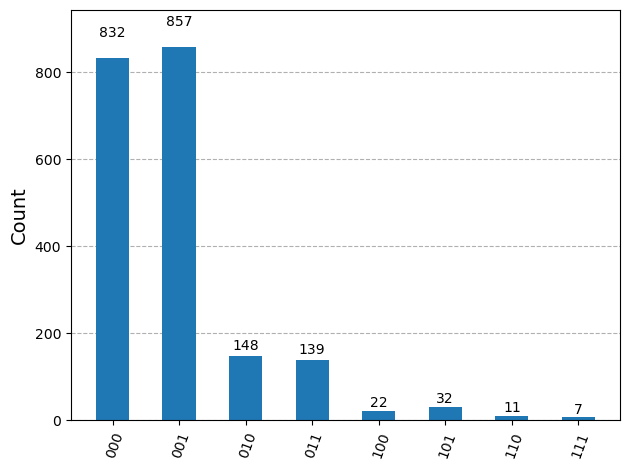

In [98]:
sim =AerSimulator()
qc_transplied=transpile(qc_single_qpe,sim)
job= sim.run(qc_transplied,shots=2048)
result=job.result()
counts=result.get_counts()
#print(counts)
plot_histogram(counts)


In [101]:
bitstring=max(counts,key=counts.get)
bitstring=bitstring[::1]
phi_estimated=int(bitstring,2)/2**n_count
print("Estimated phi:",phi_estimated)

Estimated phi: 0.125


you can see above, histogram show highest counts for 001 : 857 and also we get our correct phi estimation = 0.125 for 1/8 that means our QPE working exactly as expected.

In this notebook we learned how to implement Quantum phase estimation for single qubit rotation.QPE is the most powerful quantum algorithm because many complex problems reduce to eigenvalue estimation.it is used in quantum chemistry,shor's algoritm ,amplitude estimation,quantum simulation,fault -tolarant quantum computing.

---

**Author:** *Shreya Palase*  

**Date Created:**  *11-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day18_PhaseEstimation.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>